In [407]:

# =====================================
# Exercice 1 : Régression Logistique Binaire
# Jeu de données : diabetes.csv
# =====================================


# --------------------------
# Importer LES PAKCAGES
# --------------------------


import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns

## Variables et Significations

### Pregnancies
- **Signification** : Nombre de grossesses (c’est-à-dire le nombre de fois où la patiente a été enceinte)
- **Valeurs possibles** : Entier positif (0, 1, 2, 3, ...)

### Glucose
- **Signification** : Taux de glucose plasmatique après 2 heures d'un test d'ingestion de glucose (test d'hyperglycémie provoquée)
- **Valeurs possibles** : Nombre positif (en mg/dL, typiquement entre 0 et 200+)

### BloodPressure
- **Signification** : Pression artérielle diastolique (la pression entre deux battements du cœur)
- **Valeurs possibles** : Nombre positif (en mm Hg, typiquement entre 0 et 122)

### SkinThickness
- **Signification** : Épaisseur du pli cutané tricipital (mesurée en millimètres, indicateur de graisse corporelle)
- **Valeurs possibles** : Nombre positif (en mm, typiquement entre 0 et 99)

### Insulin
- **Signification** : Concentration d'insuline sérique (quantité d'insuline dans le sang)
- **Valeurs possibles** : Nombre positif (en μU/mL, souvent entre 0 et 846)

### BMI
- **Signification** : Indice de masse corporelle (BMI : poids/ (taille en m)^2)
- **Valeurs possibles** : Nombre positif (typiquement entre 0 et 70)

### DiabetesPedigreeFunction
- **Signification** : Antécédents héréditaires de diabète (probabilité génétique estimée basée sur les antécédents familiaux)
- **Valeurs possibles** : Nombre positif (entre 0.0 et environ 2.5)

### Age
- **Signification** : Âge de la personne
- **Valeurs possibles** : Entier positif (généralement entre 20 et 80 ans)


In [410]:
# --------------------------
# Question 1 : Chargement de données et afficher les premières lignes
# --------------------------

# Chargement des données
data = pd.read_csv('diabetes.csv')

# Affichage des premières lignes
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [412]:
# --------------------------
# Question 2 : Analyser les informations générales et statistiques
# --------------------------

# Informations sur les colonnes (types, valeurs nulles)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [414]:
# Statistiques descriptives (moyenne, écart-type, etc.)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


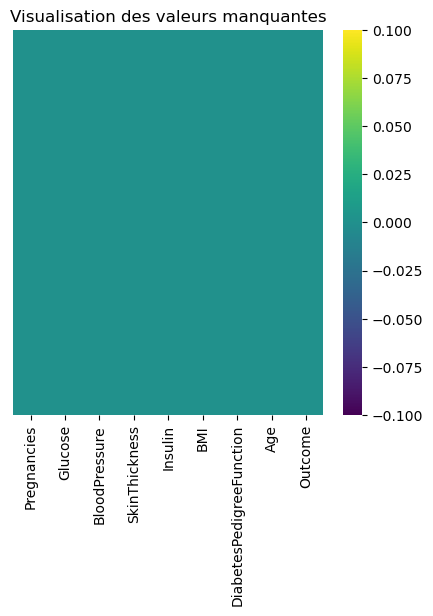

In [416]:
# Vérifier les valeurs manquantes
missing_values = data.isnull()

# Créer une heatmap pour visualiser les valeurs manquantes
plt.figure(figsize=(5, 5))
sns.heatmap(missing_values, cbar=True, cmap='viridis', yticklabels=False)

# Ajouter un titre au graphique
plt.title('Visualisation des valeurs manquantes')
plt.show()

<Figure size 1200x800 with 0 Axes>

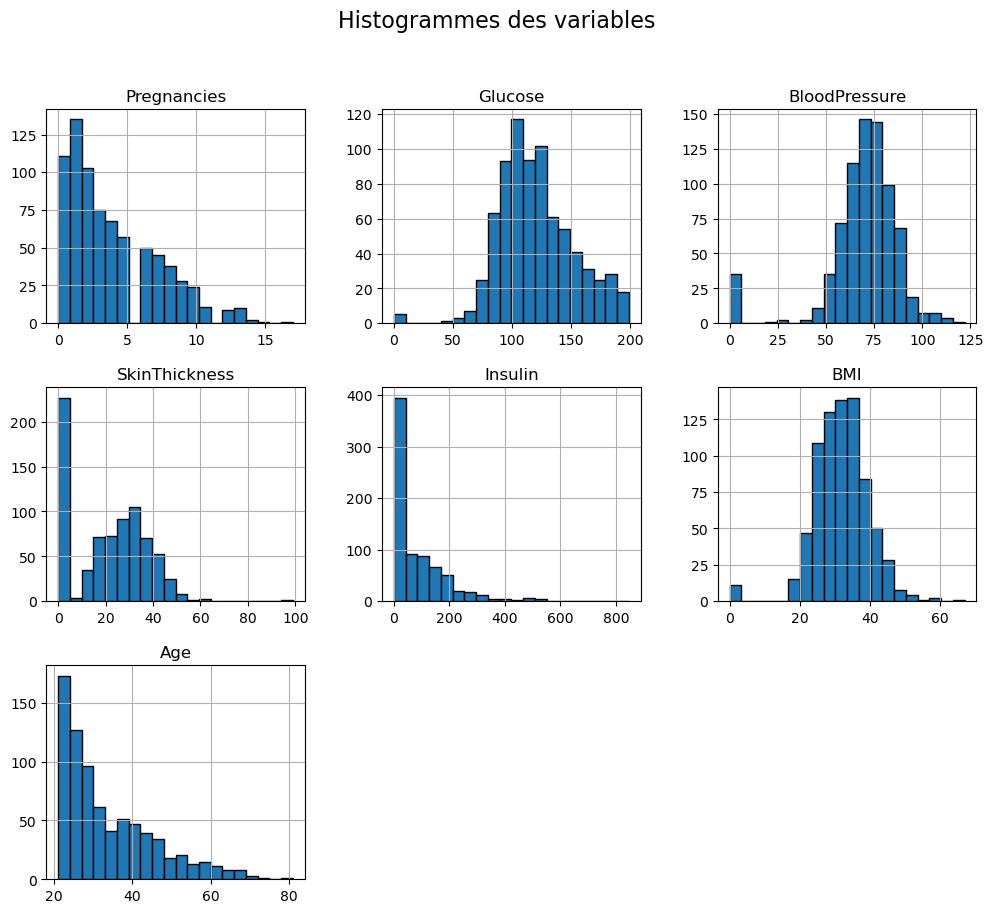

In [417]:
# Visualisation graphique des valeurs aberrantes (histogrammes et boxplots)
# Histogrammes
plt.figure(figsize=(12, 8))
data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']].hist(bins=20, edgecolor='black', figsize=(12, 10))
plt.suptitle('Histogrammes des variables', fontsize=16)
plt.show();

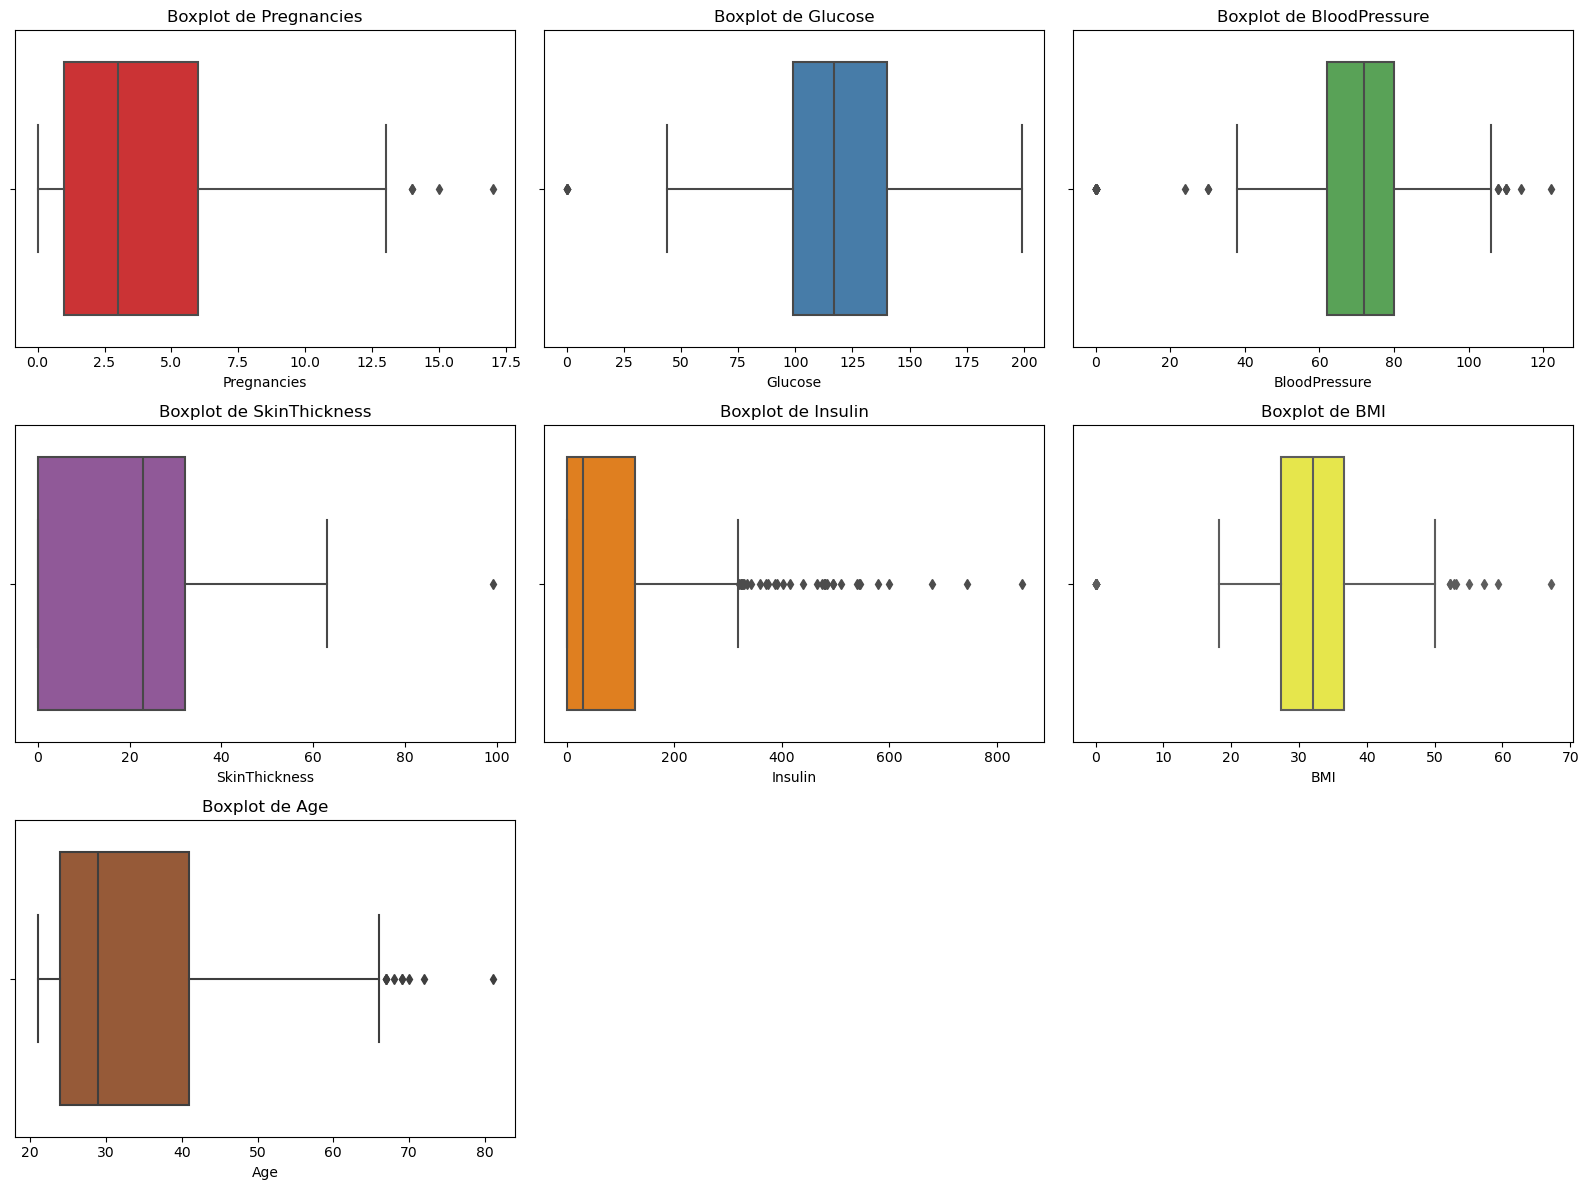

In [419]:
# Colonnes à tracer
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Générer autant de couleurs qu'il y a de colonnes
colors = sns.color_palette('Set1', n_colors=len(columns))

plt.figure(figsize=(16, 12))
for i, (col, color) in enumerate(zip(columns, colors), 1):
    ax = plt.subplot(3, 3, i)          
    sns.boxplot(x=data[col], color=color, ax=ax)
    ax.set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()


In [420]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


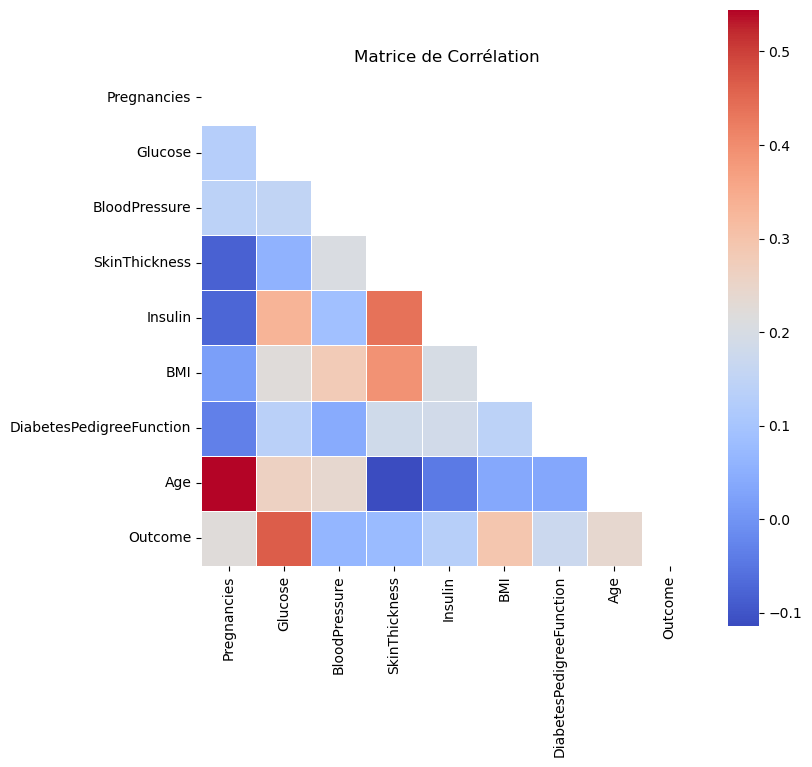

In [421]:
# Calcul de la matrice de corrélation
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Plot complet sans mask, avec annotations dans chaque case
plt.figure(figsize=(8, 8))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,        # active les annotations
    fmt='.2f',         # format à deux décimales
    cmap='coolwarm',   # palette de couleurs
    linewidths=0.5,    # séparations entre les cases
    square=True        # cases carrées
)
plt.title('Matrice de Corrélation ')
plt.show()

In [422]:
# --------------------------
# Question 3 : Détection de valeurs aberrantes ou manquantes
# --------------------------

# Vérification de valeurs nulles
data.isnull().sum()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [423]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [425]:
print((data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [426]:
# # Solution : remplacer les 0 par la médiane ou supprimer
# # Exemple pour BMI
# data['Age'] = data['Age'].replace(0, data['Age'].median())

# # Colonnes concernées
# colonnes_a_corriger = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# # Remplacer les 0 par la médiane pour chaque colonne
# for col in colonnes_a_corriger:
#     data[col] = data[col].replace(0, data[col].median())


In [427]:
# # Exemple : Colonnes à vérifier
# colonnes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# # Supprimer toutes les lignes où l'une de ces colonnes contient 0
# for col in colonnes:
#     data = data[data[col] != 0]

In [430]:
# Fonction pour détecter les outliers par IQR
def detect_outliers_iqr(df, column):
    # Calcul des quantiles Q1 et Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calcul de l'IQR
    IQR = Q3 - Q1
    
    # Calcul des bornes inférieure et supérieure
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détection des outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return len(outliers)

# Liste des colonnes à vérifier
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Initialiser un compteur pour les outliers
total_outliers = 0


# Détection des outliers pour chaque colonne
for column in columns_to_check:
    outliers_count = detect_outliers_iqr(data, column)
    total_outliers += outliers_count
    print(f"Outliers détectés avec IQR pour {column}: {outliers_count} valeurs aberrantes")

# Affichage du nombre total d'outliers détectés
print(f"\nNombre total des outliers détectés : {total_outliers}")


Outliers détectés avec IQR pour Pregnancies: 4 valeurs aberrantes
Outliers détectés avec IQR pour Glucose: 5 valeurs aberrantes
Outliers détectés avec IQR pour BloodPressure: 45 valeurs aberrantes
Outliers détectés avec IQR pour SkinThickness: 1 valeurs aberrantes
Outliers détectés avec IQR pour Insulin: 34 valeurs aberrantes
Outliers détectés avec IQR pour BMI: 19 valeurs aberrantes
Outliers détectés avec IQR pour DiabetesPedigreeFunction: 29 valeurs aberrantes
Outliers détectés avec IQR pour Age: 9 valeurs aberrantes

Nombre total des outliers détectés : 146


In [431]:
# Fonction pour supprimer les outliers par IQR
def remove_outliers_iqr(df, column):
    # Calcul des quantiles Q1 et Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calcul de l'IQR
    IQR = Q3 - Q1
    
    # Calcul des bornes inférieure et supérieure
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détection des outliers à supprimer
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Supprimer les outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_filtered, len(outliers)

# Créer une nouvelle variable pour stocker les données après suppression des outliers
new_data = data.copy()

# Initialiser un compteur pour les outliers supprimés
total_removed_outliers = 0

# Suppression des outliers pour chaque colonne
for column in columns_to_check:
    new_data, removed_count = remove_outliers_iqr(new_data, column)
    total_removed_outliers += removed_count
    print(f"Outliers supprimés pour {column}: {removed_count} valeurs aberrantes supprimées")

# Affichage du nombre total d'outliers supprimés
print(f"\nNombre total des outliers supprimés : {total_removed_outliers}")

# Nombre de lignes avant et après suppression
print(f"\nNombre de lignes avant suppression des outliers : {len(data)}")
print(f"Nombre de lignes après suppression des outliers : {len(new_data)}")


Outliers supprimés pour Pregnancies: 4 valeurs aberrantes supprimées
Outliers supprimés pour Glucose: 5 valeurs aberrantes supprimées
Outliers supprimés pour BloodPressure: 45 valeurs aberrantes supprimées
Outliers supprimés pour SkinThickness: 1 valeurs aberrantes supprimées
Outliers supprimés pour Insulin: 27 valeurs aberrantes supprimées
Outliers supprimés pour BMI: 10 valeurs aberrantes supprimées
Outliers supprimés pour DiabetesPedigreeFunction: 29 valeurs aberrantes supprimées
Outliers supprimés pour Age: 11 valeurs aberrantes supprimées

Nombre total des outliers supprimés : 132

Nombre de lignes avant suppression des outliers : 768
Nombre de lignes après suppression des outliers : 636


In [435]:
# --------------------------
# Question 4 : Séparation X (features) et y (target)
# --------------------------

X = new_data.drop('Outcome', axis=1)  # Toutes les colonnes sauf "Outcome"
y = new_data['Outcome']  # Colonne cible


In [437]:
# --------------------------
# Question 5 : Normalisation des variables
# --------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [440]:
# --------------------------
# Question 6 : Séparation des données en train/test
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

| Paramètre | Signification | Valeurs possibles | Utilité | Quand l'utiliser ? |
|:---|:---|:---|:---|:---|
| `penalty` | Type de régularisation appliquée. | `'l1'`, `'l2'`, `'elasticnet'`, `'none'` | Empêche le modèle de surapprendre (overfitting). | - `l2` : par défaut, standard.<br>- `l1` : utile pour réduire certaines variables à 0 (sélection automatique de variables).<br>- `elasticnet` : combinaison l1+l2, pratique quand on a beaucoup de variables corrélées.<br>- `none` : sans régularisation (rarement conseillé). |
| `C` | Inverse de la force de régularisation. | Réel positif (ex : `0.01`, `0.1`, `1`, `10`, `100`) | Plus C est petit, plus la régularisation est forte. | - Petit C (ex: `0.01`) : fort contrôle → moins d'overfitting.<br>- Grand C (ex: `10`, `100`) : modèle plus flexible, mais risque d'overfitting. |
| `solver` | Algorithme d'optimisation utilisé. | `'newton-cg'`, `'lbfgs'`, `'liblinear'`, `'sag'`, `'saga'` | Trouve les coefficients optimaux. | - `lbfgs` : rapide et stable pour petits/moyens datasets, multi-classes OK.<br>- `liblinear` : bon pour `l1` et petits datasets binaires.<br>- `saga` : rapide pour grands datasets et supporte `elasticnet`.<br>- `newton-cg`, `sag` : cas particuliers, grands datasets. |
| `max_iter` | Nombre maximum d'itérations. | Entier positif (ex : `100`, `200`, `500`, `1000`) | Permet de s'assurer que l'optimisation converge. | Si tu vois un warning `"ConvergenceWarning"`, augmente `max_iter`. |
| `class_weight` | Pondération automatique des classes. | `None`, `'balanced'`, ou dictionnaire `{classe: poids}` | Corrige le déséquilibre de classes. | - `balanced` : ajuste automatiquement les poids des classes selon leur fréquence → recommandé si classes déséquilibrées.<br>- `None` : si les classes sont équilibrées. |
| `random_state` | Graine de l'aléatoire. | Entier (ex : `0`, `42`, `123`) | Assure des résultats reproductibles. | Toujours fixer (`random_state=42`) pour avoir les mêmes résultats à chaque exécution. |
| `multi_class` | Comment gérer plusieurs classes. | `'auto'`, `'ovr'`, `'multinomial'` | Permet la classification multiclasse. | - `auto` : scikit-learn choisit tout seul.<br>- `ovr` (one-vs-rest) : par défaut pour binaires, entraîne un classifieur par classe.<br>- `multinomial` : recommandé pour vraie multi-classification (meilleure performance souvent). |
| `l1_ratio` | Poids entre L1 et L2 (seulement si `penalty='elasticnet'`). | Réel entre `0.0` et `1.0` (ex : `0.5`) | Combine les avantages de l1 et l2. | - Si `0` → pur L2.<br>- Si `1` → pur L1.<br>- Entre `0` et `1` → mélange, utile pour sélection de variables + contrôle de poids. |


In [444]:
# --------------------------
# Question 7 : Construire un modèle de régression logistique
# --------------------------


# Création du modèle
model = LogisticRegression(
    penalty='l2',           # régularisation L2 par défaut (on peut tester l1, elasticnet)
    C=0.01,                  # force de régularisation (on peut tester 0.01, 0.1, 1, 10)
    solver='lbfgs',         # bon pour petits/moyens datasets
    max_iter=100,           # nombre d'itérations pour s'assurer que ça converge
    #class_weight='balanced', # utile si classes déséquilibrées
    random_state=26,        # pour reproductibilité
    multi_class='auto',     # gère auto binaire/multiclasse
    l1_ratio=0.0           # à utiliser si penalty='elasticnet'
)

# Entraînement
model.fit(X_train, y_train)



LogisticRegression(C=0.01, l1_ratio=0.0, random_state=26)

In [445]:
# --------------------------
# Question 8 : Interpréter les coefficients
# --------------------------

# Coefficients associés aux variables
coefficients = pd.DataFrame({
    'Feature': new_data.columns[:-1],
    'Coefficient': model.coef_[0]
})
print(coefficients)




                    Feature  Coefficient
0               Pregnancies     0.208697
1                   Glucose     0.517282
2             BloodPressure     0.054254
3             SkinThickness     0.000860
4                   Insulin     0.045326
5                       BMI     0.240521
6  DiabetesPedigreeFunction     0.150859
7                       Age     0.209409


In [448]:
# --------------------------
# Question 9 : Évaluer les performances
# --------------------------

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

Matrice de confusion:
 [[87  5]
 [25 11]]


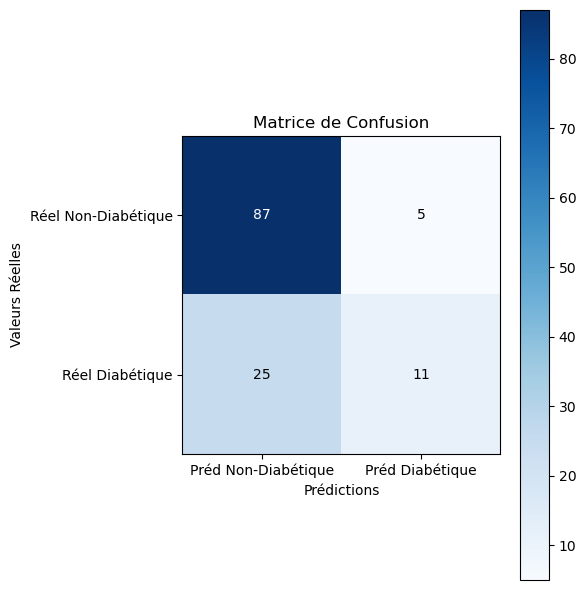

In [449]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:\n", cm)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')

# Annotate each cell with the count
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > cm.max()/2 else "black")

# Labels, title, and ticks
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Préd Non-Diabétique', 'Préd Diabétique'])
ax.set_yticklabels(['Réel Non-Diabétique', 'Réel Diabétique'])
ax.set_xlabel('Prédictions')
ax.set_ylabel('Valeurs Réelles')
ax.set_title('Matrice de Confusion')

# Colorbar
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

In [451]:
# Accuracy
print("Accuracy :", accuracy_score(y_test, y_pred))


Accuracy : 0.765625


In [454]:
# Rapport de classification
print("Rapport de classification:\n", classification_report(y_test, y_pred))

Rapport de classification:
               precision    recall  f1-score   support

           0       0.78      0.95      0.85        92
           1       0.69      0.31      0.42        36

    accuracy                           0.77       128
   macro avg       0.73      0.63      0.64       128
weighted avg       0.75      0.77      0.73       128



In [456]:
# --------------------------
# Courbe ROC et AUC
# --------------------------

# Probabilités pour ROC
y_prob = model.predict_proba(X_test)[:,1]

In [458]:
# Calcul courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


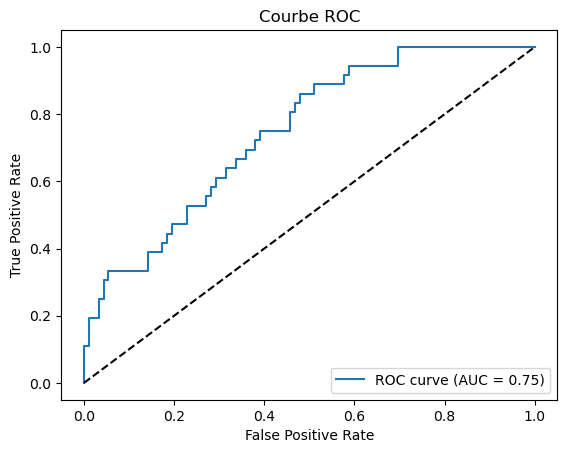

In [461]:
# Affichage de la courbe
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], 'k--')  # Diagonale
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# --------------------------
# Question 10 : Interprétation de la courbe ROC
# --------------------------
# Un modèle parfait aurait AUC proche de 1.0
# Un modèle aléatoire aurait AUC proche de 0.5